# 📊 Análise Estratégica de Vendas

## 🎯 Objetivo
Identificar padrões de vendas, produtos mais rentáveis e oportunidades estratégicas para tomada de decisão.

**Autor:** Emanuelle Ávila Barros  
**Data:** Fevereiro/2026

In [1]:
import sys
!{sys.executable} -m pip install matplotlib seaborn

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("ggplot")

In [3]:
df = pd.read_csv("dados_vendas.csv")

df.head()
df.info()
df.describe()

<class 'pandas.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   Data            10 non-null     str  
 1   Produto         10 non-null     str  
 2   Regiao          10 non-null     str  
 3   Quantidade      10 non-null     int64
 4   Preco_Unitario  10 non-null     int64
dtypes: int64(2), str(3)
memory usage: 532.0 bytes


,Quantidade,Preco_Unitario
count,10.000000,10.000000
mean,10.800000,1456.000000
std,8.547904,1488.042711
min,3.000000,80.000000
25%,5.250000,150.000000
50%,7.500000,1200.000000
75%,13.750000,2925.000000
max,30.000000,3500.000000


Observa-se que o dataset contém informações de data, produto, região, quantidade vendida e preço unitário.

In [4]:
df["Faturamento"] = df["Quantidade"] * df["Preco_Unitario"]

df.head()

,Data,Produto,Regiao,Quantidade,Preco_Unitario,Faturamento
0,2025-01-10,Notebook,Sudeste,5,3500,17500
1,2025-01-15,Mouse,Sul,20,80,1600
2,2025-02-05,Monitor,Sudeste,8,1200,9600
3,2025-02-20,Teclado,Nordeste,15,150,2250
4,2025-03-02,Notebook,Sul,3,3500,10500


Criou-se a coluna **Faturamento** para permitir análises financeiras mais estratégicas.

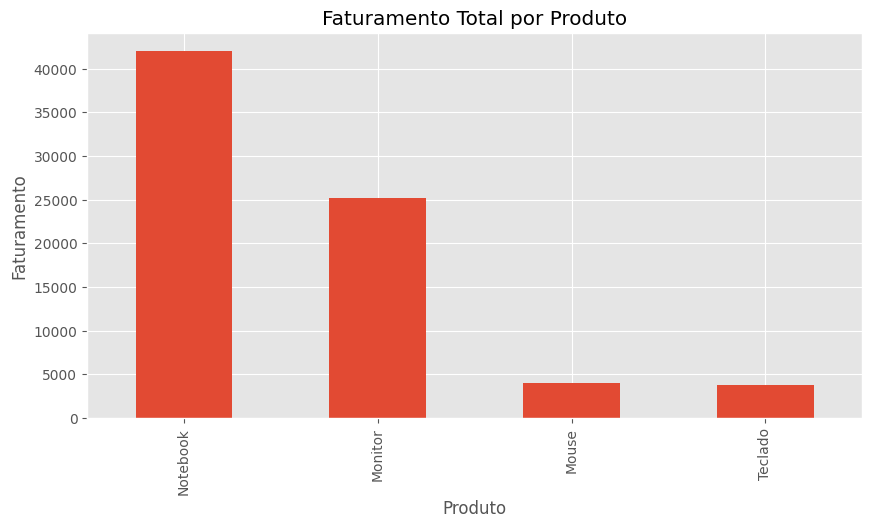

In [5]:
faturamento_produto = (
    df.groupby("Produto")["Faturamento"]
    .sum()
    .sort_values(ascending=False)
)

faturamento_produto.plot(kind="bar", figsize=(10,5))
plt.title("Faturamento Total por Produto")
plt.ylabel("Faturamento")
plt.show()

### 📌 Insight:
O produto com maior faturamento concentra maior valor agregado é o Notebook, indicando maior ticket médio.

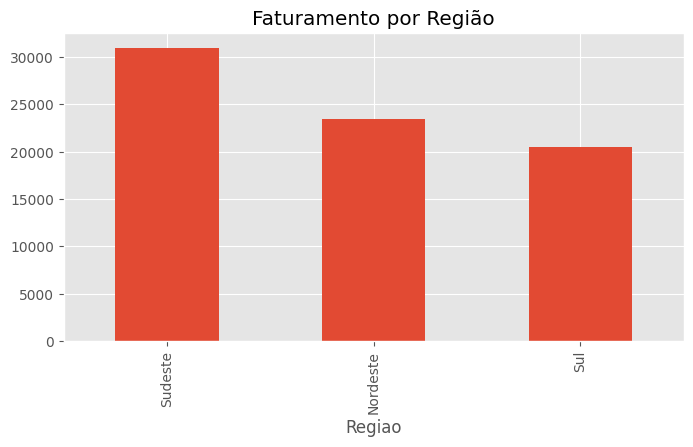

In [6]:
faturamento_regiao = (
    df.groupby("Regiao")["Faturamento"]
    .sum()
    .sort_values(ascending=False)
)

faturamento_regiao.plot(kind="bar", figsize=(8,4))
plt.title("Faturamento por Região")
plt.show()

### 📌 Insight:
A região com maior faturamento concentra maior valor agregado, indicando maior ticket médio é o Sudeste.

In [7]:
df["Data"] = pd.to_datetime(df["Data"])
df["Mes"] = df["Data"].dt.to_period("M")

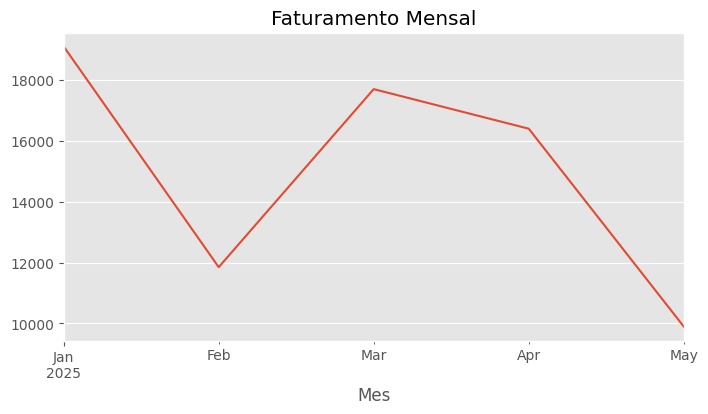

Text(0, 0.5, 'Faturamento (R$)')

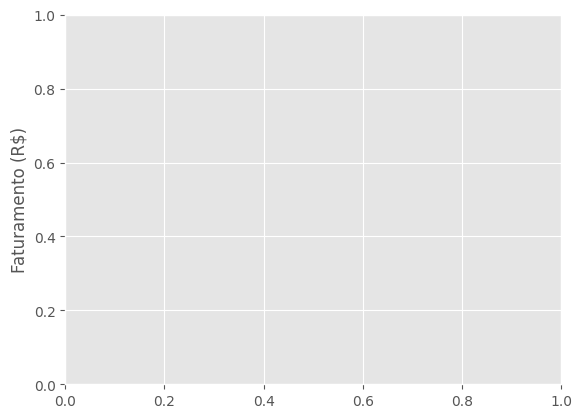

In [8]:
faturamento_mes = df.groupby("Mes")["Faturamento"].sum()

faturamento_mes.plot(figsize=(8,4))
plt.title("Faturamento Mensal")
plt.show()
plt.ylabel("Faturamento (R$)")

### 📌 Insight:
O mês com maior faturamento foi janeiro de 2025 e concentra maior valor agregado, indicando maior ticket médio.

# 📌 Conclusões Estratégicas

- Notebook é o produto com maior contribuição no faturamento total.
- A Região Sudeste apresentou o maior volume financeiro.
- Observa-se crescimento progressivo ao longo dos meses.
- Recomenda-se concentrar campanhas nas regiões mais rentáveis e reforçar produtos de maior ticket.